# Эксперимент по предсказыванию исхода по симптомам 

Задача: изучить методы обучения без учителя(unsupervised learning) на примере схожей задачи по прогнозированию нализия заболевания короновирусом по наличию информации о симптомах.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
# очищенный от мусора датасет симптомов у пациентов
df=pd.read_csv('Cleaned-Data.csv')
del df['Country']
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [8]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df=df.drop_duplicates()

# Визуализация данных

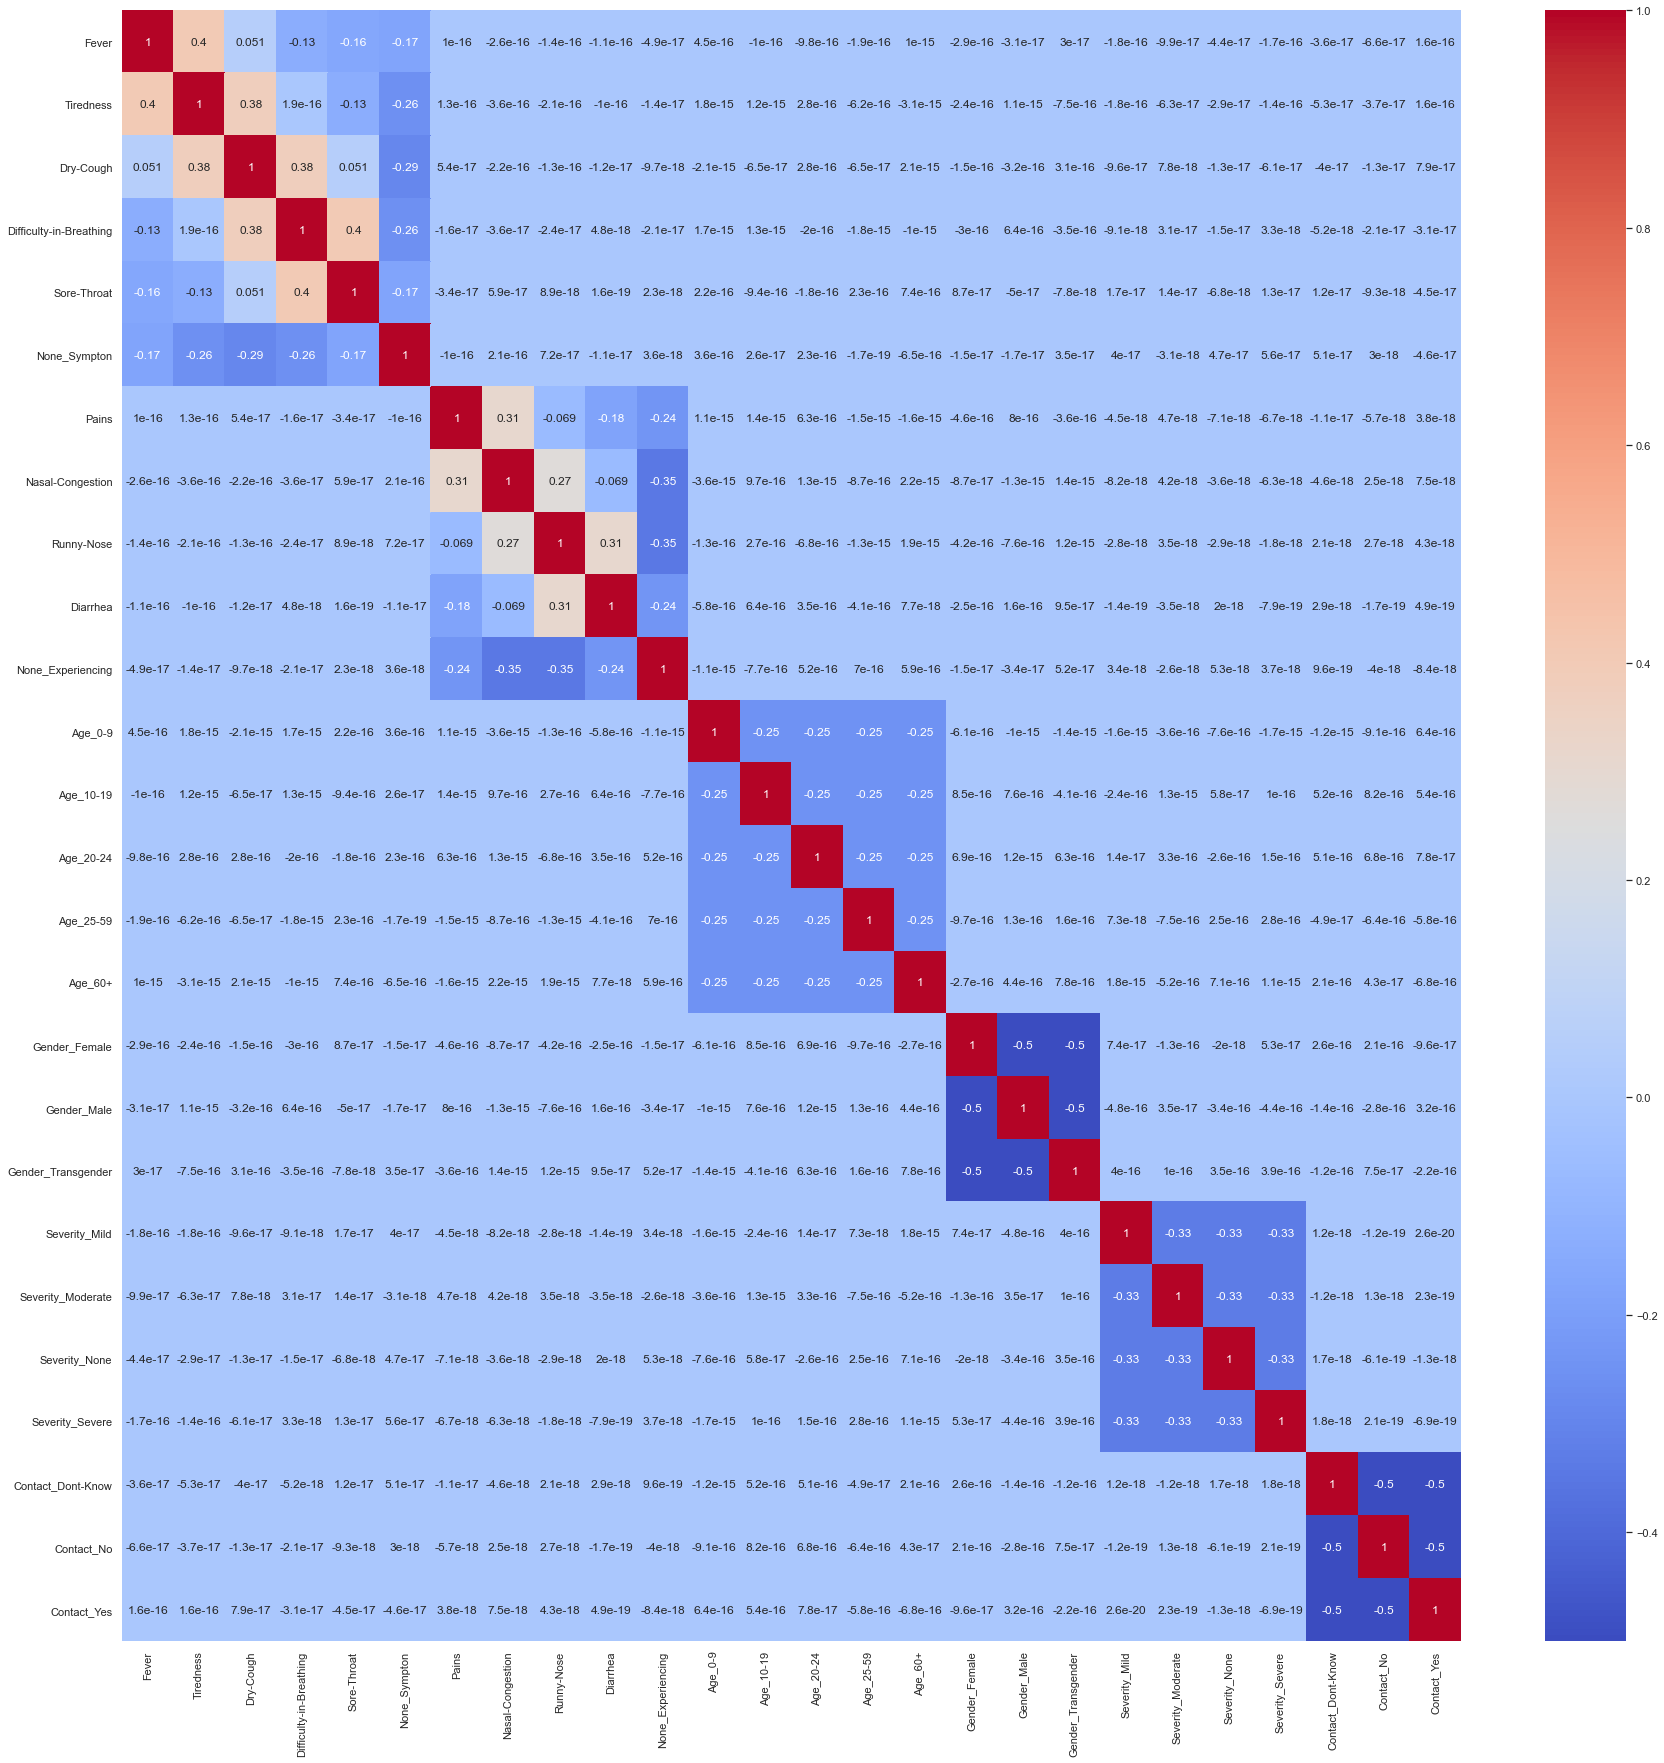

In [13]:
figure = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

array([[<AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Tiredness'}>,
        <AxesSubplot:title={'center':'Dry-Cough'}>,
        <AxesSubplot:title={'center':'Difficulty-in-Breathing'}>,
        <AxesSubplot:title={'center':'Sore-Throat'}>],
       [<AxesSubplot:title={'center':'None_Sympton'}>,
        <AxesSubplot:title={'center':'Pains'}>,
        <AxesSubplot:title={'center':'Nasal-Congestion'}>,
        <AxesSubplot:title={'center':'Runny-Nose'}>,
        <AxesSubplot:title={'center':'Diarrhea'}>],
       [<AxesSubplot:title={'center':'None_Experiencing'}>,
        <AxesSubplot:title={'center':'Age_0-9'}>,
        <AxesSubplot:title={'center':'Age_10-19'}>,
        <AxesSubplot:title={'center':'Age_20-24'}>,
        <AxesSubplot:title={'center':'Age_25-59'}>],
       [<AxesSubplot:title={'center':'Age_60+'}>,
        <AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>,
        <AxesSubplot:title={'cent

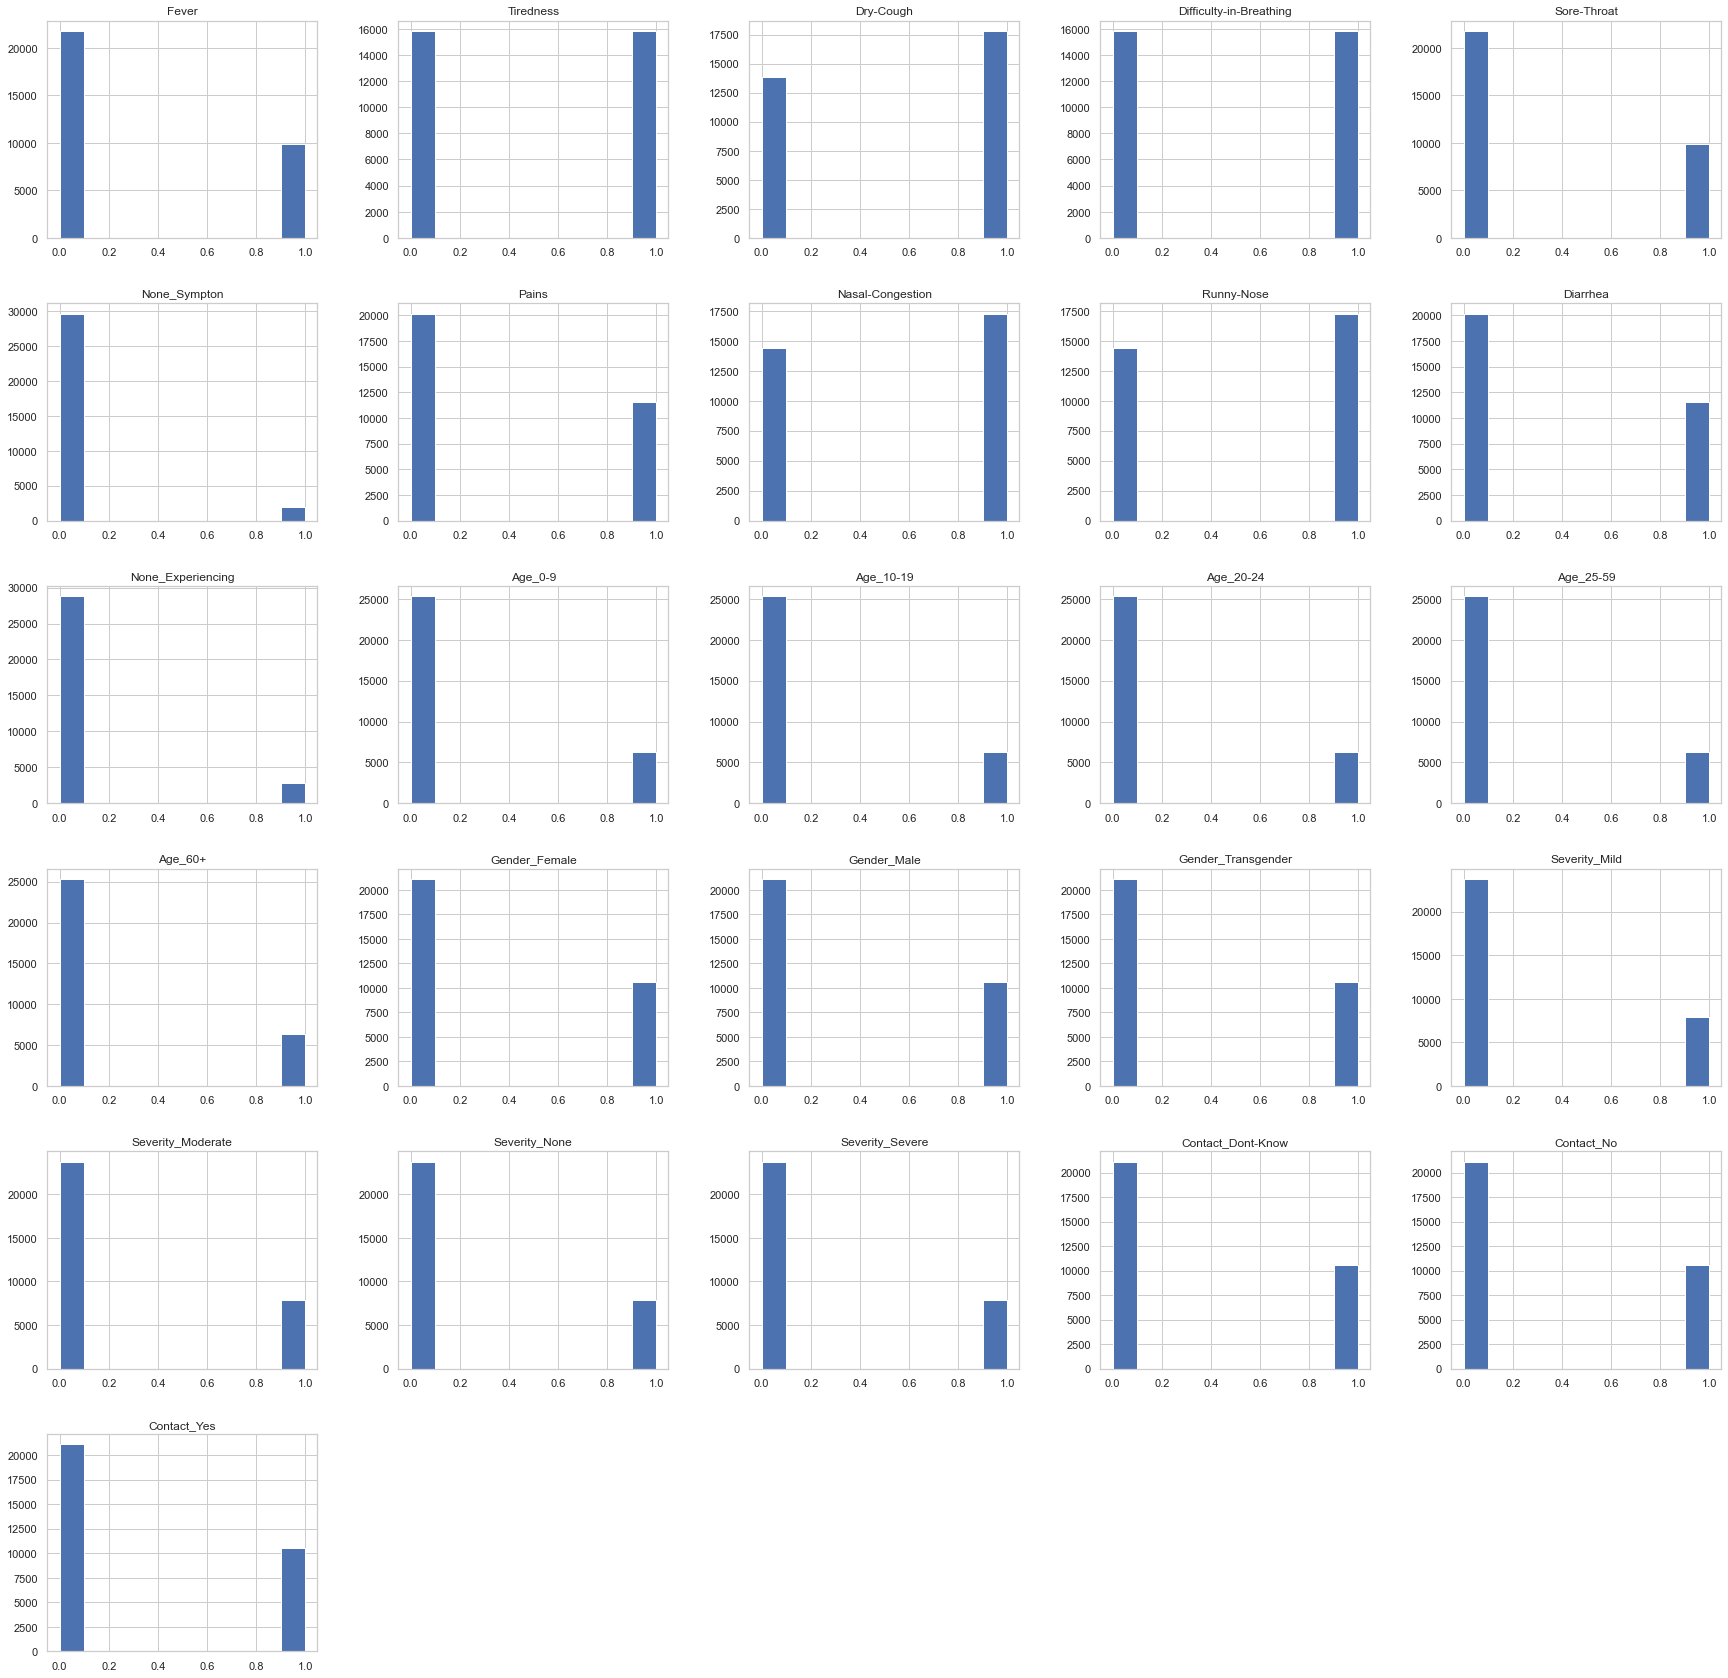

In [14]:
df.hist(figsize=(30,30))

In [15]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes'],
      dtype='object')

In [16]:
train_df=df.copy()

In [17]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_df_scaled=scaler.fit_transform(train_df)

# K-NN clustering

In [18]:
inertias = []

for i in range(1,15):
    km=KMeans(n_clusters=i, random_state=2)
    km.fit(train_df_scaled)
    inertias.append(km.inertia_)

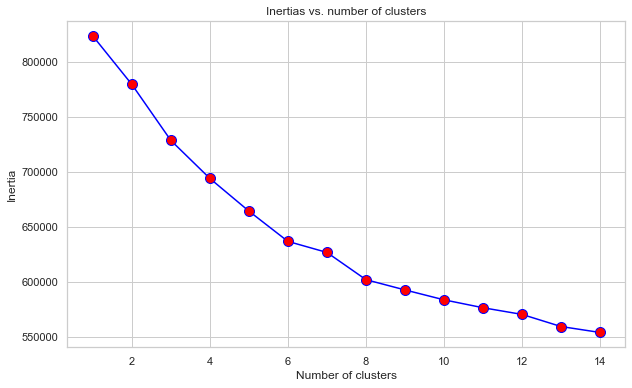

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15), inertias, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertias vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

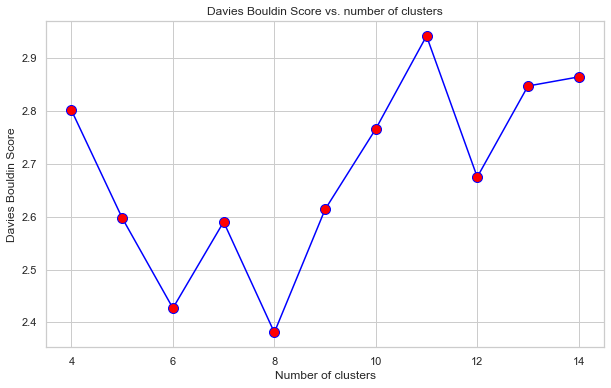

In [21]:
from sklearn.metrics import davies_bouldin_score
bouldin_score=[]

for i in range(4,15):
    km=KMeans(n_clusters=i, random_state=2)
    labels=km.fit_predict(train_df_scaled)
    bouldin_score.append(davies_bouldin_score(train_df_scaled, labels))
plt.figure(figsize=(10,6))
plt.plot(range(4,15), bouldin_score, color='blue', marker='o', markerfacecolor='red', markersize=10)
plt.title('Davies Bouldin Score vs. number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

In [22]:
km_model=KMeans(n_clusters=8, random_state=2)
km_model.fit(train_df_scaled)

KMeans(random_state=2)

In [23]:
labels=km_model.labels_

In [24]:
df_clusters=pd.DataFrame(km_model.cluster_centers_, columns=train_df.columns)
df_clusters

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,-4.821497e-15,-1.355615e-14,-4.583795e-15,1.924501e-01,1.924501e-01,-5.773503e-01,1.924501e-01,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,-9.156349e-17,1.083740e-14,1.085516e-14,-2.677432e-19,-8.924773e-20,-7.383637e-17,-8.924773e-20,7.401487e-17,7.401487e-17,7.401487e-17
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,1.582159e-15,-6.910381e-15,-6.082076e-15,-5.773503e-01,-5.773503e-01,1.732051e+00,-5.773503e-01,7.401487e-17,7.401487e-17,7.401487e-17
3,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,-4.945726e-17,1.619892e-14,-1.016989e-14,1.924501e-01,1.924501e-01,-5.773503e-01,1.924501e-01,7.401487e-17,7.401487e-17,7.401487e-17
4,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,3.066404e-15,1.083740e-14,1.287626e-14,-1.855044e-19,7.522976e-20,-4.447714e-17,-7.008984e-21,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,-7.559289e-01,-1.095445e+00,-1.095445e+00,-7.559289e-01,...,-1.002111e-15,-3.653830e-17,-3.983065e-17,-1.994757e-18,-6.649189e-19,-7.268503e-17,-6.649189e-19,7.401487e-17,7.401487e-17,7.401487e-17
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,7.559289e-02,1.095445e-01,1.095445e-01,7.559289e-02,...,-3.293443e-14,1.816388e-14,-2.534625e-15,-2.677432e-19,-7.008984e-21,-7.367190e-17,-8.924773e-20,7.401487e-17,7.401487e-17,7.401487e-17
7,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.140838e-16,-2.835554e-16,4.078107e-16,5.829372e-17,...,-5.585599e-16,1.232740e-16,3.204648e-16,-2.712477e-18,-4.555839e-19,-6.256219e-17,-6.798714e-19,7.401487e-17,7.401487e-17,7.401487e-17


Всех пациентов разбили на 8 кластеров, вероятно кластер №7 имеет пациентов с наименьшей возможностью заражения ковидом

In [25]:
covid_pca=PCA(n_components=3)
principal_comp=covid_pca.fit_transform(train_df_scaled)

In [26]:
principal_comp=pd.DataFrame(principal_comp,columns=['pca1','pca2','pca3'])
principal_comp

,pca1,pca2,pca3
0,-2.038199,-1.806678,-0.114316
1,-2.109674,-1.858100,0.382341
2,-2.222238,-1.829587,-0.160831
3,-1.972878,-1.867418,0.314698
4,-2.044353,-1.918840,0.811355
...,...,...,...
31675,3.699477,3.431477,0.090279
31676,3.586914,3.459990,-0.452893
31677,3.678580,3.436983,-0.165960
31678,3.607105,3.385561,0.330696


In [27]:
principal_comp1=pd.concat([principal_comp,pd.DataFrame({"Cluster":labels})],axis=1)
principal_comp1.sample(10)

,pca1,pca2,pca3,Cluster
27258,1.257630,-0.648261,-1.527159,3
24938,0.210607,3.357930,-2.514626,5
18901,3.742144,-0.170092,-0.105453,7
11118,1.261755,-0.245551,1.194085,6
14894,-2.259432,0.820031,-0.711024,4
23778,1.315247,-1.162494,0.817914,0
23687,0.219236,-1.170025,1.724781,2
5440,-0.732056,-0.433247,-1.148570,1
19327,-0.645070,-1.156331,2.053324,0
9931,0.519417,-0.348758,0.735271,6


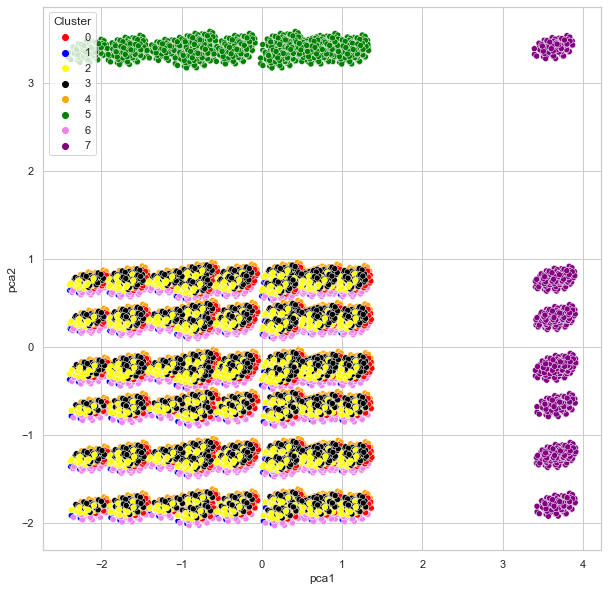

In [28]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=principal_comp1, palette=['red', 'blue', 'yellow', 'black', 'orange', 'green', 'violet','purple'])
plt.show()

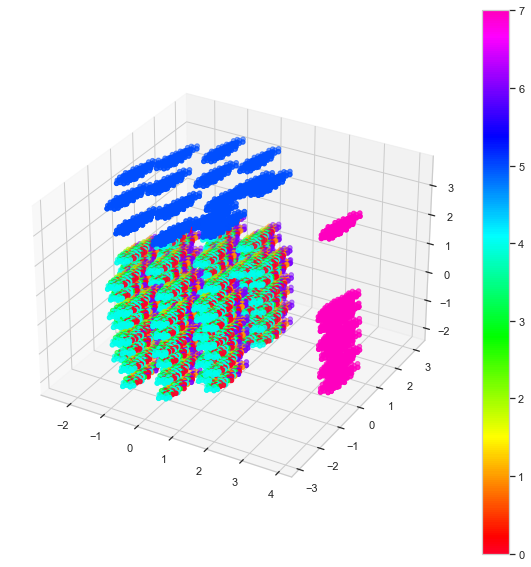

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=principal_comp1['pca1'],ys=principal_comp1['pca3'],zs=principal_comp1['pca2'],c=principal_comp1['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()